<a href="https://colab.research.google.com/github/MateoPatinoRios/MateoPati-o/blob/main/Tarea03_1007362148.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import optimize

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

In [4]:
def f(x):
  return np.exp(x)-2-np.cos(np.exp(x)-2)

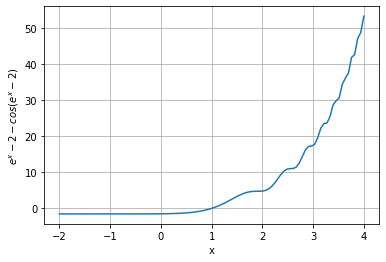

In [5]:
x=np.linspace(-2,4,100)
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('$e^{x}-2-cos(e^{x}-2)$')
plt.grid()

In [6]:
#Construir g(x)=x-f(x)
def g(x):
  return x-f(x)

In [7]:
P=optimize.fixed_point(g,0,xtol=1e-16)
print(f'La soluciòn de la ecuaciôn por el método de punto fijo es {P}')
P=optimize.bisect(f,0,2,xtol=1e-16)
print(f'La soluciòn de la ecuaciôn por el método de la bisección es {P}')
P=optimize.newton(f,0,tol=1e-16,maxiter=200)
print(f'La soluciòn de la ecuaciôn por el método de la secante es {P}')

La soluciòn de la ecuaciôn por el método de punto fijo es 1.0076239716581366
La soluciòn de la ecuaciôn por el método de la bisección es 1.0076239716581368
La soluciòn de la ecuaciôn por el método de la secante es 1.0076239716581366


2. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) +\frac{g}{2\omega^2} \sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$

**La ecuación fue corregida tal y como se encuentra en el libro de Richard Burden**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


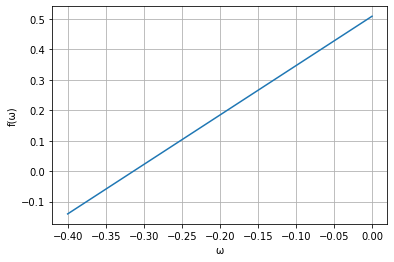

In [8]:
def x(ω,t):
    g=9.76
    return -g/(2*ω**2)*((np.exp(ω*t)-np.exp(-ω*t))/2-np.sin(ω*t))
def f(ω): #función a la que se le va hallar la raíz.
    return 0.51-x(ω,1)
ω=np.linspace(-0.4,0,1000)
y=f(ω)
plt.plot(ω,y)
plt.xlabel('ω')
plt.ylabel('f(ω)')
plt.grid()
plt.show()

In [9]:
P=optimize.fixed_point(lambda x:x-f(x),-0.3,xtol=1e-5)
print(f'la rapidez ω con que θ cambia hallada con el método de punto fijo es: {P} rad/s')
P=optimize.bisect(f,-0.4,-0.3,xtol=1e-5)
print(f'la rapidez ω con que θ cambia hallada con el método de la bisección es {P} rad/s')
P=optimize.newton(f,-0.3,tol=1e-5,maxiter=200)
print(f'la rapidez ω con que θ cambia hallada con el método de la secante es {P} rad/s')
print(f'El desplazamiento de la partícula con ω={P} rad/s y en el tiempo= 1 s es: x={x(P,1)} m')

la rapidez ω con que θ cambia hallada con el método de punto fijo es: -0.3135209839265538 rad/s
la rapidez ω con que θ cambia hallada con el método de la bisección es -0.31351928710937493 rad/s
la rapidez ω con que θ cambia hallada con el método de la secante es -0.31352098392626293 rad/s
El desplazamiento de la partícula con ω=-0.31352098392626293 rad/s y en el tiempo= 1 s es: x=0.5099999999995305 m


3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


In [10]:
def V(h,r,L):#Volumen del fluido dentro del reservorio
   return L*(1/2*np.pi*r**2-r**2*np.arcsin(h/r)-h*(r**2-h**2)**(1/2))

In [11]:
def f(h): #Función a la que se le hallará la raíz
   return V(h,r=1,L=10)-12.4

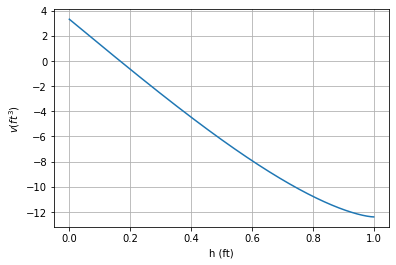

In [12]:
h=np.linspace(0,1,1000)
y=f(h)
plt.plot(h,y)
plt.xlabel('h (ft)')
plt.ylabel('$v (ft^{3})$')
plt.grid()

In [13]:
P=optimize.fixed_point(lambda x:x-f(x),0.15,xtol=1e-8,maxiter=500)
print(f'la profundidad del fluido en el tanque hallada con el método de punto fijo es: {P} ft')
P=optimize.bisect(f,0,0.2,xtol=1e-8)
print(f'la profundidad del fluido en el tanque hallada con el método de bisección es: {P} ft')
P=optimize.newton(f,-0.3,tol=1e-8,maxiter=200)
print(f'la profundidad del fluido en el tanque hallada con el método de la secante es: {P} ft')
print(f'El volumen del fluido en el tanque a una profundidad h={P} ft es V={V(P,r=1,L=10)} ft^3')

la profundidad del fluido en el tanque hallada con el método de punto fijo es: 0.16616603465836816 ft
la profundidad del fluido en el tanque hallada con el método de bisección es: 0.16616603732109075 ft
la profundidad del fluido en el tanque hallada con el método de la secante es: 0.16616603465836804 ft
El volumen del fluido en el tanque a una profundidad h=0.16616603465836804 ft es V=12.400000000000002 ft^3


4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados



In [125]:
def f(alfa,l=89,h=49,D=55,beta=np.deg2rad(11.5)):
  A=l*np.sin(beta)
  B=l*np.cos(beta)
  C=(h+0.5*D)*np.sin(beta)-0.5*D*np.tan(beta)
  E=(h+0.5*D)*np.cos(beta)-0.5*D
  return A*np.sin(alfa)*np.cos(alfa)+B*(np.sin(alfa))**2-C*np.cos(alfa)-E*np.sin(alfa)

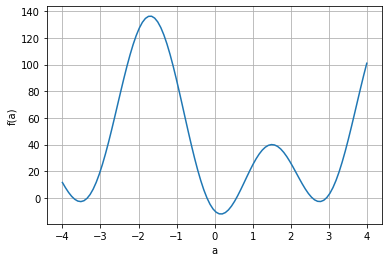

In [126]:
x=np.linspace(-4,4,100)
plt.plot(x,f(x))
plt.xlabel('a')
plt.ylabel('f(a)')
plt.grid()

In [127]:
#Construir g(x)=x-f(x)
def g(x):
  return x-f(x)

In [132]:
P=optimize.fixed_point(g,0.56,xtol=1e-8)
print(f'La raìz de f(alfa) hallada mediante el método de punto fijo es {P} que en grados es {P*180/np.pi}°')
P=optimize.bisect(f,0.55,0.58,xtol=1e-8)
print(f'La raìz de f(alfa) hallada mediante el método de la bisección es {P} que en grados es {P*180/np.pi}°')
P=optimize.newton(f,0.56,tol=1e-8)
print(f'La raìz de f(alfa) hallada mediante el método de la secante es {P} que en grados es {P*180/np.pi}°')

La raìz de f(alfa) hallada mediante el método de punto fijo es 0.5754730121943988 que en grados es 32.97217482241961°
La raìz de f(alfa) hallada mediante el método de la bisección es 0.5754730105400084 que en grados es 32.972174727630026°
La raìz de f(alfa) hallada mediante el método de la secante es 0.5754730121943992 que en grados es 32.97217482241963°


5. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)-f(z) }{h}
\end{equation}

In [19]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

In [120]:
Npx_X = 480 #Numero de pixeles en x
Npx_Y = 480 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

In [121]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**7+0.626
def fp(z): 
  return 7*z**6

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h

In [122]:
a = 0.3
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )

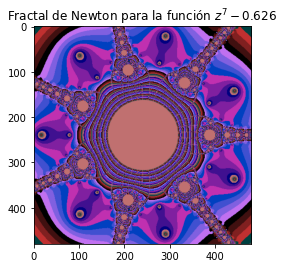

In [124]:
plt.title('Fractal de Newton para la función $z^{7}-0.626$')
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)

*El fractal de Newton se construye diviendo al plano complejo en un rectángulo. Se va a asignar un color a cada número complejo dentro del rectángulo, en función de cuántas iteraciones se requieren para que el método de Newton-Raphson converja a una raíz del polinomio en cuestión, es decir que en cada iteración se irá cambiando el punto inicial. Se puede observar que el método de Newton es muy suceptible al valor inicial que se escoja para iterar.*